### **Menimport Library**

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Deskripsi Data**

##### Fitur Input dan Tipe
The dataset consists of 70 000 records of patients data in 12 features
| Nama Fitur                | Tipe Fitur          | Nama Kolom dalam Data | Tipe Data                  |
|---------------------------|---------------------|------------------------|----------------------------|
| **Age**                   | Objective Feature   | age                    | int (days)                 |
| **Height**                | Objective Feature   | height                 | int (cm)                   |
| **Weight**                | Objective Feature   | weight                 | float (kg)                 |
| **Gender**                | Objective Feature   | gender                 | categorical code           |
| **Systolic blood pressure** | Examination Feature | ap_hi                  | int (mm/Hg)                       |
| **Diastolic blood pressure** | Examination Feature | ap_lo                  | int (mm/Hg)                        |
| **Cholesterol**           | Examination Feature | cholesterol            | 1: normal, 2: above normal, 3: well above normal |
| **Glucose**               | Examination Feature | gluc                   | 1: normal, 2: above normal, 3: well above normal |
| **Smoking**               | Subjective Feature  | smoke                  | binary; 0: no, 1 : yes                     |
| **Alcohol intake**        | Subjective Feature  | alco                   | binary; 0: no, 1 : yes                     |
| **Physical activity**     | Subjective Feature  | active                 | binary; 0: no, 1 : yes                     |
| **Presence or absence of cardiovascular disease** | Target Variable     | cardio                 | binary; 0: healthy, 1 : cardio                     |


### **Load Data**

In [68]:
df = pd.read_csv('dataset/cardio.csv', sep=';')

# Menampilkan 5 baris pertama data
print('Sample Data')
display(df.head())


Sample Data


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### **Exploratory Data Analysis (EDA) Tahap 1**

In [69]:
# Menampilkan informasi tentang kolom data
print('\nInformasi Kolom\n')
display(df.info())

# Menampilkan statistik deskriptif data
print('\nStatistika Deskriptif')
display(df.describe())

# Mengecek apakah ada nilai yang hilang
print('\nMengecek Missing Values')
display(df.isnull().sum())


Informasi Kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


None


Statistika Deskriptif


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000



Mengecek Missing Values


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

##### **Data Insights Sebelum Preprocessing**

**Usia (age)**
- Rata-rata usia (mean) adalah sekitar 19.469 hari (~53,3 tahun).
- Usia minimum adalah 10.798 hari (~29,6 tahun), dan usia maksimum adalah 23.713 hari (~64,9 tahun).
- Rentang usia ini menunjukkan bahwa dataset berfokus pada populasi dewasa, mungkin dengan fokus pada populasi yang berisiko terkena penyakit kardiovaskular.

**Jenis Kelamin (gender)**
- Data ini menggunakan 1 untuk perempuan dan 2 untuk laki-laki.
- Rata-rata gender adalah 1.35, yang menunjukkan bahwa dataset ini memiliki lebih banyak perempuan daripada laki-laki.

**Tinggi Badan (height)**
- Rata-rata tinggi badan adalah 164,36 cm, dengan standar deviasi 8,21 cm.
- Nilai minimum dan maksimum (55 cm hingga 250 cm) mengindikasikan adanya beberapa anomali data atau kesalahan pengukuran.

**Berat Badan (weight)**
- Berat badan rata-rata adalah 74,21 kg dengan standar deviasi 14,40 kg.
- Nilai berat minimum 10 kg dan maksimum 200 kg menunjukkan kemungkinan kesalahan atau anomali dalam data.

**Tekanan Darah Sistolik (ap_hi)**
- Nilai rata-rata adalah 128,82 mmHg, dengan standar deviasi yang sangat tinggi (154 mmHg).
- Ada nilai tekanan darah negatif (-150 mmHg), dan nilai maksimum yang sangat tinggi (16.020 mmHg), yang jelas merupakan outlier atau kesalahan input data.

**Tekanan Darah Diastolik (ap_lo)**
- Rata-rata tekanan diastolik adalah 96,63 mmHg.
- Sama seperti tekanan sistolik, terdapat outlier ekstrem (negatif hingga 11.000 mmHg), yang mengindikasikan kesalahan atau outlier dalam data.

**Kolesterol (cholesterol)**
- Data ini diklasifikasikan ke dalam 3 kategori (1, 2, 3).
- Nilai rata-rata adalah 1,37, artinya sebagian besar subjek memiliki tingkat kolesterol normal (kategori 1), dengan sebagian lainnya memiliki tingkat kolesterol di atas normal (kategori 2 atau 3).

**Glukosa (gluc)**
- Sama dengan kolesterol, glukosa juga diklasifikasikan menjadi 3 kategori.
- Rata-rata adalah 1,23, menunjukkan sebagian besar orang memiliki kadar glukosa normal.

**Perilaku Merokok (smoke)**
- Hanya sekitar 8,8% dari sampel yang merokok, ditunjukkan oleh nilai rata-rata 0,088.

**Konsumsi Alkohol (alco)**
- Rata-rata adalah 0,053, menunjukkan hanya sekitar 5,3% orang yang mengonsumsi alkohol secara rutin.

**Aktivitas Fisik (active)**
- Sebagian besar individu aktif secara fisik (rata-rata 0,80), yang berarti sekitar 80% dari data mewakili orang-orang yang terlibat dalam aktivitas fisik.

**Penyakit Kardiovaskular (cardio)**
- Dataset cukup seimbang terkait label target ini, dengan rata-rata 0,50, yang menunjukkan bahwa sekitar 50% dari sampel memiliki kondisi kardiovaskular.


#### **Distribusi Variabel**

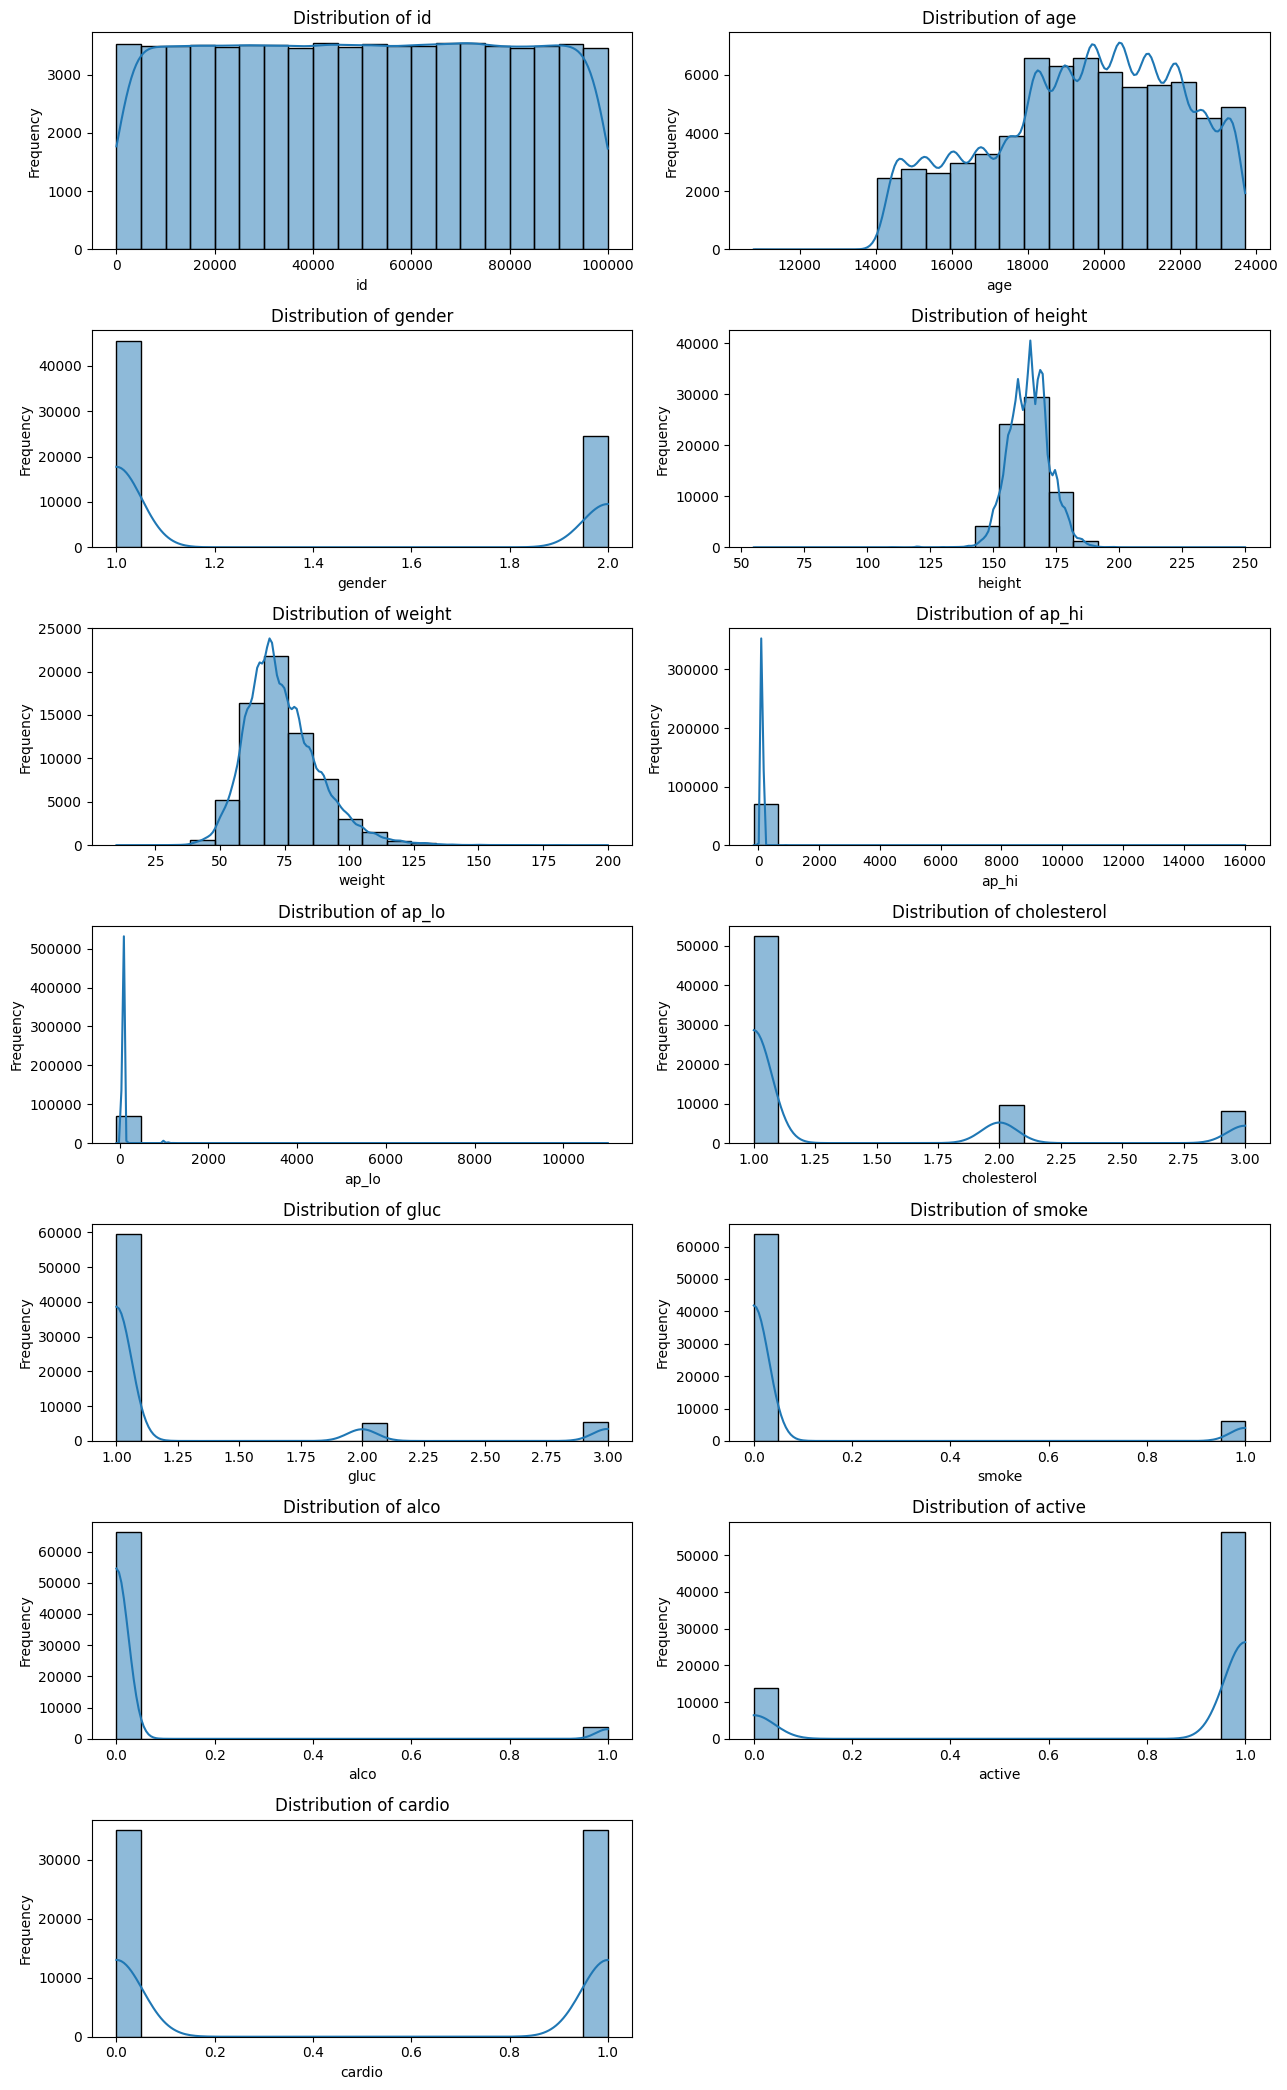

In [70]:
# Define the features you want to visualize
features = df.columns

# Calculate the number of rows needed for the subplots
num_features = len(features)
num_rows = (num_features + 1) // 2  # Adding 1 to account for odd number of features

# Create a figure with subplots
plt.figure(figsize=(13, num_rows * 3))

# Loop through each feature to create a histogram
for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i + 1)
    
    # Keep the 'age' variable as it is (in days)
    data = df[feature]
    xlabel = feature

    # Create histogram with KDE
    sns.histplot(data, bins=20, kde=True)
    
    # Set plot titles and labels
    plt.title(f'Distribution of {feature}')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#### **Mengecek Outlier**

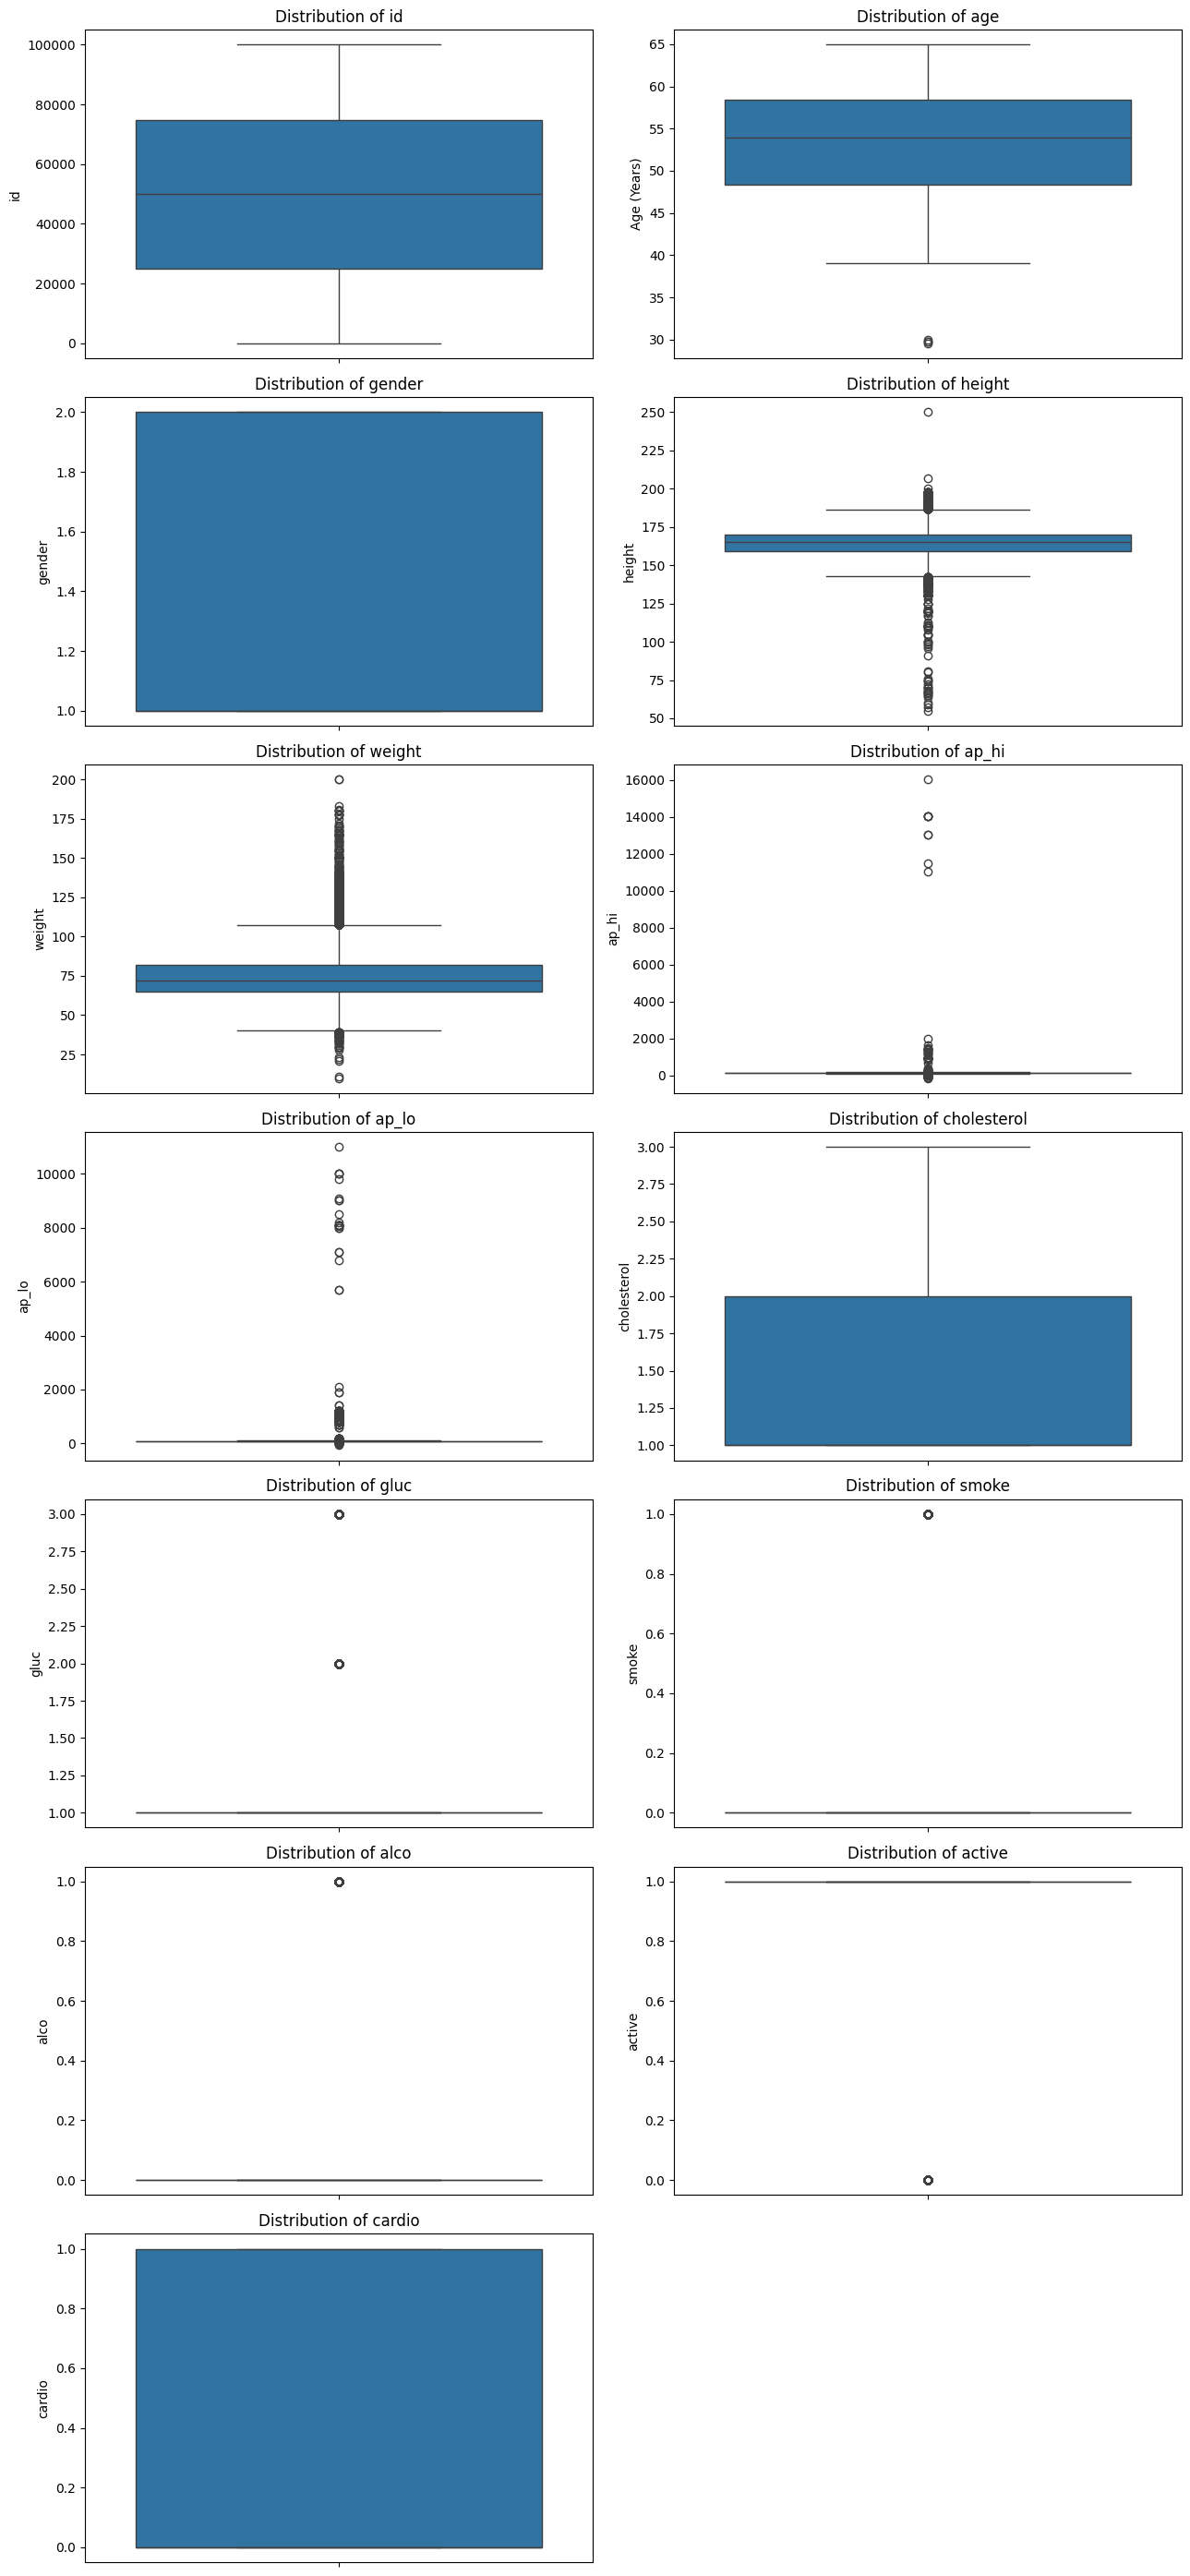

In [71]:
# Define the features you want to visualize
features = df.columns

# Calculate the number of rows needed for the subplots
num_features = len(features)
num_rows = (num_features + 1) // 2  # Adding 1 to account for odd number of features

# Create a figure with subplots
plt.figure(figsize=(13, num_rows * 4))

# Loop through each feature to create a boxplot
for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i + 1)
    
    # Check if the feature is 'age' and adjust if needed
    if feature == 'age':
        data = df[feature] / 365.25  # Convert age from days to years
        ylabel = 'Age (Years)'
    else:
        data = df[feature]
        ylabel = feature

    # Create boxplot
    sns.boxplot(y=data)
    
    # Set plot titles and labels
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')  # No xlabel for boxplot
    plt.ylabel(ylabel)

# Adjust layout
plt.tight_layout()
plt.show()

### **Data Preprocessing**

In [72]:
# Tekanan darah sistolik dan diastolik tidak boleh negatif
df = df[(df['ap_hi'] > 0) & (df['ap_lo'] > 0)]

# Tekanan darah sistolik harus lebih tinggi daripada tekanan darah diastolik
df = df[df['ap_hi'] > df['ap_lo']]

# Tinggi badan yang tidak masuk akal (misalnya, lebih dari 250 cm atau kurang dari 100 cm)
df = df[(df['height'] >= 100) & (df['height'] <= 250)]

# Berat badan yang tidak masuk akal (misalnya, lebih dari 200 kg atau kurang dari 30 kg)
df = df[(df['weight'] >= 30) & (df['weight'] <= 200)]

# Menangani outlier menggunakan metode IQR (Interquartile Range)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Terapkan IQR untuk fitur ap_hi dan ap_lo
df = remove_outliers(df, 'ap_hi')
df = remove_outliers(df, 'ap_lo')

# Menangani nilai kategori yang mungkin salah
# Pastikan gender hanya memiliki nilai 1 atau 2
df = df[(df['gender'] == 1) | (df['gender'] == 2)]

# Ubah kolom 'age' dari satuan hari menjadi satuan tahun
df['age'] = (df['age'] / 365).astype(int)

# Reset index setelah membersihkan data
df.reset_index(drop=True, inplace=True)

# Cek data yang telah dibersihkan
display(df.describe())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,64469.000000,64469.000000,64469.000000,64469.000000,64469.000000,64469.000000,64469.000000,64469.000000,64469.000000,64469.000000,64469.000000,64469.000000,64469.000000
mean,49967.953761,52.904171,1.351844,164.490453,74.260954,126.625774,81.788069,1.364346,1.225736,0.087592,0.053049,0.803502,0.498410
std,28857.832886,6.743168,0.477549,7.951095,14.113972,14.384070,7.712278,0.680329,0.572745,0.282704,0.224132,0.397352,0.500001
min,0.000000,29.000000,1.000000,100.000000,30.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24924.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50019.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74886.000000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


##### **Data Insights Setelah Preprocessing**

**Jumlah data yang digunakan**
- Setelah preprocessing, jumlah data yang tersisa adalah 64,469. Ada pengurangan data dari 70,000 data awal, yang menunjukkan bahwa sekitar 5,531 data dihapus karena anomali atau outlier.

**Rata-rata Usia**
- Usia rata-rata adalah sekitar 53 tahun. Ini menunjukkan bahwa dataset ini mayoritas terdiri dari orang-orang paruh baya, yang umumnya memiliki risiko lebih tinggi terhadap penyakit kardiovaskular.

**Distribusi Gender**
- Nilai gender 1 (perempuan) dan 2 (laki-laki) setelah preprocessing memiliki rata-rata 1.35, yang menunjukkan bahwa data sedikit lebih condong ke perempuan.

**Tinggi dan Berat Badan**
- Rata-rata tinggi adalah 164.49 cm dan rata-rata berat badan adalah 74.26 kg. Ini adalah data yang cukup normal untuk populasi umum. Namun, tetap ada rentang yang cukup besar antara nilai minimum dan maksimum pada tinggi dan berat badan.

**Tekanan Darah (ap_hi dan ap_lo)**
- Setelah preprocessing, tekanan darah sistolik (ap_hi) rata-rata adalah 126.63 mmHg dan tekanan darah diastolik (ap_lo) rata-rata adalah 81.79 mmHg. Kedua nilai ini masih berada dalam kisaran normal untuk tekanan darah.
- Nilai maksimum untuk tekanan darah sistolik dan diastolik telah menjadi lebih realistis setelah pembersihan, dengan tekanan sistolik maksimum 170 mmHg dan diastolik maksimum 105 mmHg. Ini masih mungkin terjadi pada pasien hipertensi.

**Kolesterol dan Glukosa**
- Rata-rata kolesterol adalah 1.36, yang menunjukkan bahwa mayoritas pasien memiliki kadar kolesterol normal (nilai 1). Demikian juga, nilai glukosa rata-rata adalah 1.22, yang menunjukkan sebagian besar pasien memiliki kadar glukosa yang normal.

**Kebiasaan Merokok, Konsumsi Alkohol, dan Aktivitas Fisik**
- Persentase perokok dalam data sangat kecil, dengan rata-rata 0.087 atau sekitar 8.7% dari populasi.
Konsumsi alkohol juga rendah, dengan rata-rata 0.053 atau sekitar 5.3% dari populasi.
- Rata-rata aktivitas fisik adalah 0.803, menunjukkan bahwa sekitar 80% dari populasi dianggap aktif secara fisik.

**Penyakit Kardiovaskular (Cardio)**
- Proporsi data dengan penyakit kardiovaskular (cardio = 1) adalah 49.8%, menunjukkan bahwa hampir separuh dari populasi ini terdiagnosis dengan penyakit kardiovaskular, yang konsisten dengan data populasi umum untuk orang-orang paruh baya.

### **Exploratory Data Analysis (EDA) Tahap 2**

#### **Korelasi**

In [73]:
# Pastikan 'Cardio' adalah variabel target yang ingin Anda korelasikan
correlations = df.corr()

# Matriks korelasi antara fitur dan target (PDRB)
correlation_with_target = correlations['cardio']

print(correlation_with_target)

id             0.005311
age            0.232675
gender        -0.002172
height        -0.020668
weight         0.165079
ap_hi          0.431986
ap_lo          0.337162
cholesterol    0.219192
gluc           0.085995
smoke         -0.019152
alco          -0.010736
active        -0.037409
cardio         1.000000
Name: cardio, dtype: float64


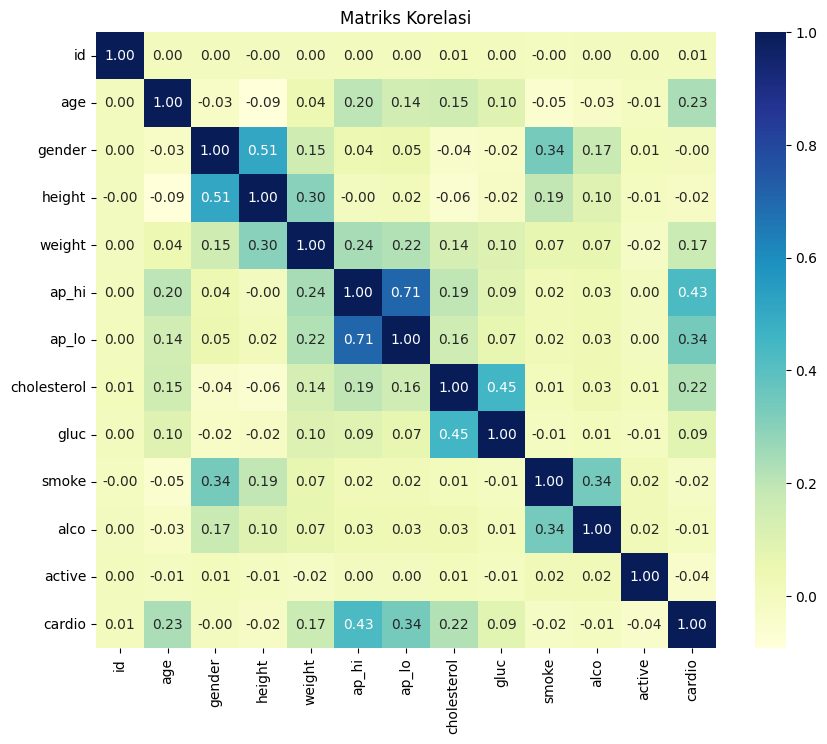

In [74]:
# Menghitung matriks korelasi
correlations = df.corr()

# Menggunakan Seaborn untuk membuat plot matriks korelasi berwarna
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

#### **Mengecek Imbalance Data**

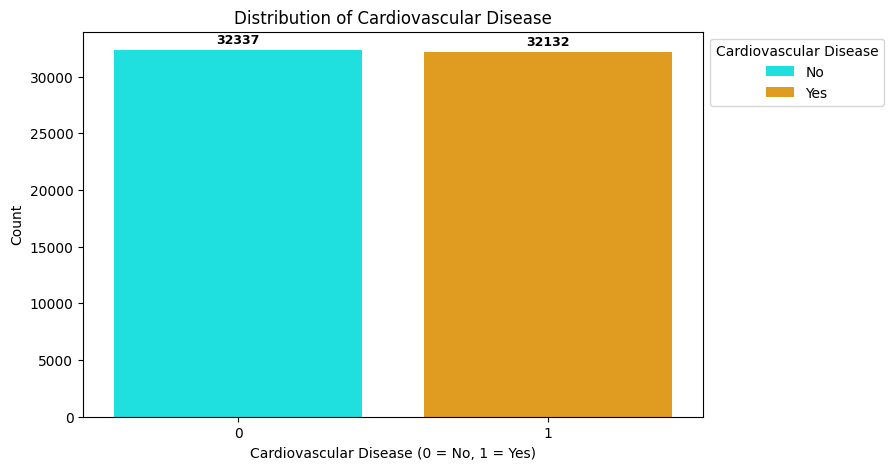

In [75]:
# Distribution of target variable
plt.figure(figsize=(8, 5))

# Create a count plot with 'hue' to differentiate the colors
ax = sns.countplot(x='cardio', data=df, hue='cardio', palette={0: 'aqua', 1: 'orange'})

# Add title and labels
plt.title('Distribution of Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add labels on top of the bars with bold font, but only if the height is greater than 0
for p in ax.patches:
    if p.get_height() > 0:  # Only add label if the height is greater than 0
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=9, color='black', fontweight='bold', 
                    xytext=(0, 5), textcoords='offset points')

# Add and position the legend
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'], loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

- Terdapat 32,337 pasien yang tidak memiliki penyakit kardiovaskular (nilai 0) dan 32,132 pasien yang memiliki penyakit kardiovaskular (nilai 1).
- Dataset ini cukup seimbang dengan hanya selisih 205 data antara pasien dengan dan tanpa penyakit kardiovaskular, sehingga model machine learning tidak rentan terhadap masalah ketidakseimbangan kelas.

#### **Distribusi Umur terhadap Penyakit Cardio**

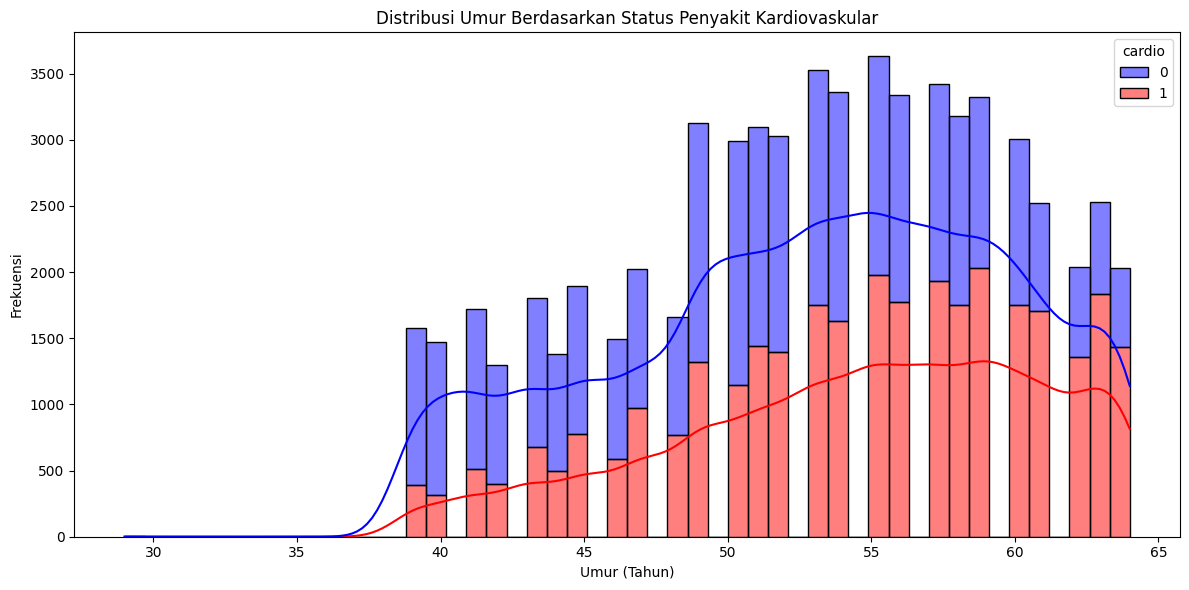

In [76]:
# Plot distribusi umur dalam tahun per kategori target
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df['age'], hue='cardio', multiple='stack', bins=50, kde=True, palette={0: 'blue', 1: 'red'})
plt.title('Distribusi Umur Berdasarkan Status Penyakit Kardiovaskular')
plt.xlabel('Umur (Tahun)')
plt.ylabel('Frekuensi')

# Menambahkan dan memposisikan legenda
plt.tight_layout()
plt.show()


- Penyakit kardiovaskular lebih umum terjadi pada usia di atas 45 tahun, dengan puncak kasus pada rentang usia 50-60 tahun.
- Risiko penyakit kardiovaskular meningkat seiring bertambahnya usia, terutama setelah usia 45 tahun.

#### **Distribusi Kolesterol dan Glukosa terhadap Penyakit Cardio**

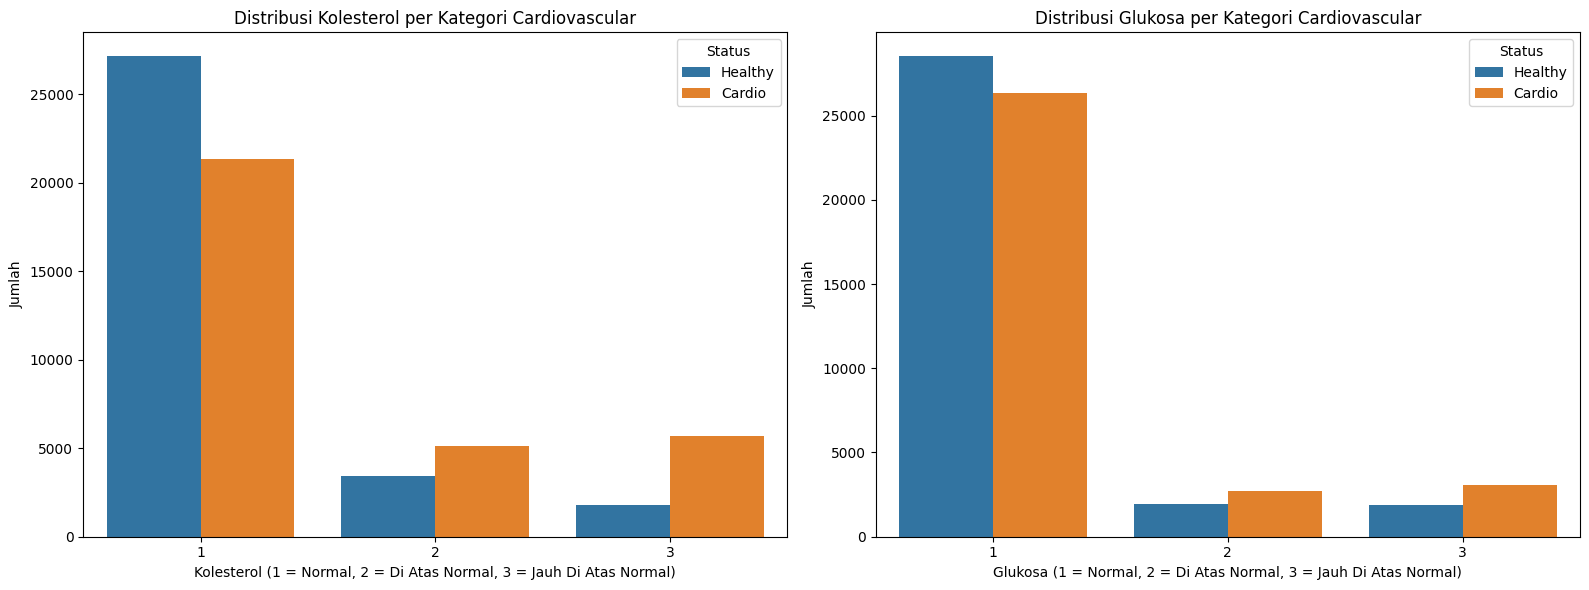

In [77]:
# Membuat subplot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot untuk Kolesterol
sns.countplot(x='cholesterol', hue='cardio', data=df, ax=axs[0])
axs[0].set_title('Distribusi Kolesterol per Kategori Cardiovascular')
axs[0].set_xlabel('Kolesterol (1 = Normal, 2 = Di Atas Normal, 3 = Jauh Di Atas Normal)')
axs[0].set_ylabel('Jumlah')
axs[0].legend(title='Status', labels=['Healthy', 'Cardio'])

# Plot untuk Glukosa
sns.countplot(x='gluc', hue='cardio', data=df, ax=axs[1])
axs[1].set_title('Distribusi Glukosa per Kategori Cardiovascular')
axs[1].set_xlabel('Glukosa (1 = Normal, 2 = Di Atas Normal, 3 = Jauh Di Atas Normal)')
axs[1].set_ylabel('Jumlah')
axs[1].legend(title='Status', labels=['Healthy', 'Cardio'])

plt.tight_layout() 
plt.show()


#### **Distribusi Gaya Hidup terhadap Penyakit Cardio**

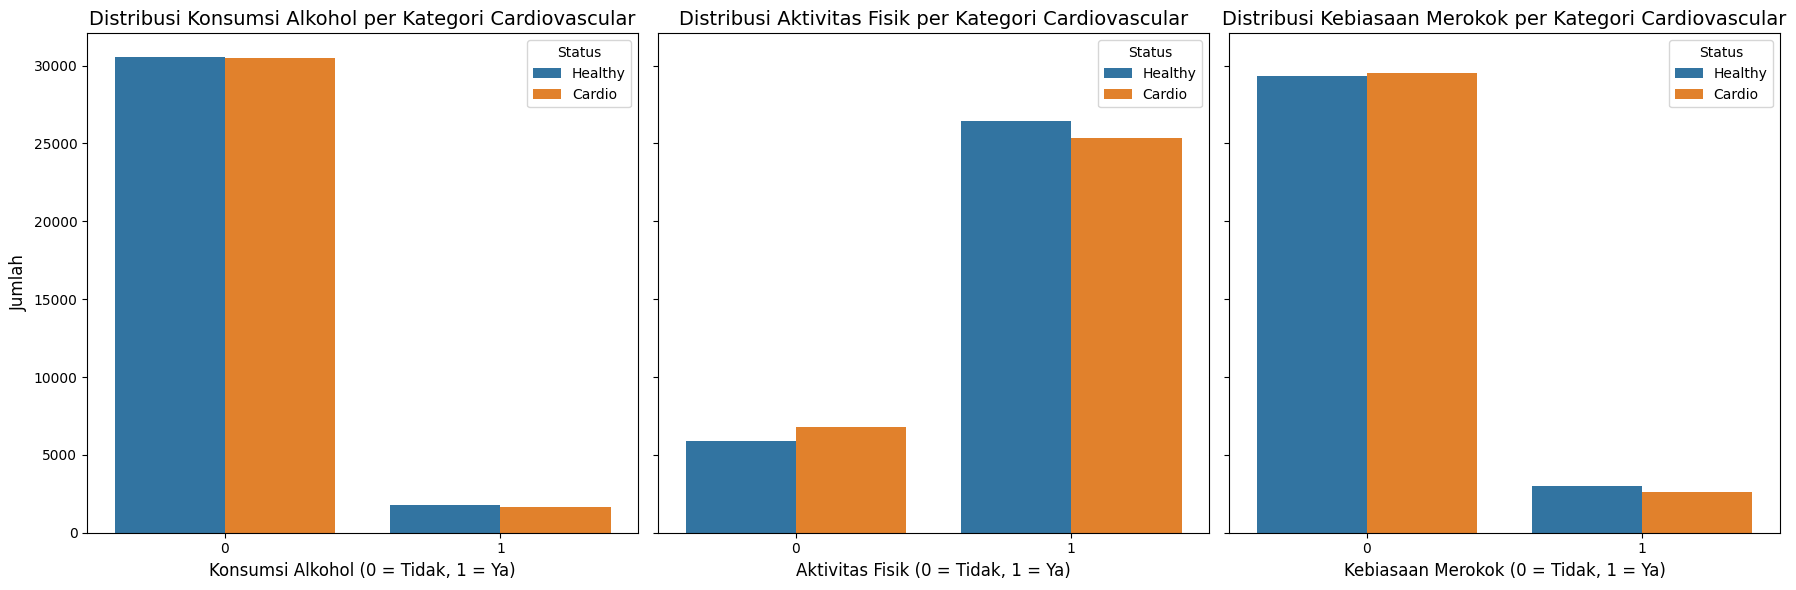

In [78]:
# Setup the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot untuk Konsumsi Alkohol
sns.countplot(x='alco', hue='cardio', data=df, ax=axs[0])
axs[0].set_title('Distribusi Konsumsi Alkohol per Kategori Cardiovascular', fontsize=14)
axs[0].set_xlabel('Konsumsi Alkohol (0 = Tidak, 1 = Ya)', fontsize=12)
axs[0].set_ylabel('Jumlah', fontsize=12)
axs[0].legend(title='Status', labels=['Healthy', 'Cardio'], fontsize=10)

# Plot untuk Aktivitas Fisik
sns.countplot(x='active', hue='cardio', data=df, ax=axs[1])
axs[1].set_title('Distribusi Aktivitas Fisik per Kategori Cardiovascular', fontsize=14)
axs[1].set_xlabel('Aktivitas Fisik (0 = Tidak, 1 = Ya)', fontsize=12)
axs[1].set_ylabel('Jumlah', fontsize=12)
axs[1].legend(title='Status', labels=['Healthy', 'Cardio'], fontsize=10)

# Plot untuk Kebiasaan Merokok
sns.countplot(x='smoke', hue='cardio', data=df, ax=axs[2])
axs[2].set_title('Distribusi Kebiasaan Merokok per Kategori Cardiovascular', fontsize=14)
axs[2].set_xlabel('Kebiasaan Merokok (0 = Tidak, 1 = Ya)', fontsize=12)
axs[2].set_ylabel('Jumlah', fontsize=12)
axs[2].legend(title='Status', labels=['Healthy', 'Cardio'], fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### **Feature Engineering**

In [79]:

# 1. Body Mass Index (BMI)
df['bmi'] = round(df['weight'] / (df['height'] / 100) ** 2,2)

# 2. Age Group
def age_group(age):
    if age < 45:
        return 'Young'
    elif 45 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(age_group)

# 3. Blood Pressure Categories
def blood_pressure_category(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 'Normal'
    elif 120 <= ap_hi < 130 and ap_lo < 80:
        return 'Elevated'
    elif 130 <= ap_hi < 140 or 80 <= ap_lo < 90:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

df['blood_pressure_category'] = df.apply(lambda row: blood_pressure_category(row['ap_hi'], row['ap_lo']), axis=1)

# 4. Pulse Pressure (PP)
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

# 5. Mean Arterial Pressure (MAP)
df['map'] = round((df['ap_hi'] + 2 * df['ap_lo']) / 3,2)

# 6. Obesity Level
def obesity_level(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

df['obesity_level'] = df['bmi'].apply(obesity_level)

# 7. Systolic-to-Diastolic Ratio
df['systolic_to_diastolic_ratio'] = round(df['ap_hi'] / df['ap_lo'],2)

# 8. Lifestyle Score
def lifestyle_score(smoke, alco, active):
    if active == 1 and smoke == 0 and alco == 0:
        return 1
    elif active == 1 and (smoke == 1 or alco == 1):
        return 0
    else:
        return -1

df['lifestyle_score'] = df.apply(lambda row: lifestyle_score(row['smoke'], row['alco'], row['active']), axis=1)

In [80]:
display(df.head())
display(df.info())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,active,cardio,bmi,age_group,blood_pressure_category,pulse_pressure,map,obesity_level,systolic_to_diastolic_ratio,lifestyle_score
0,0,50,2,168,62.0,110,80,1,1,0,...,1,0,21.97,Middle-aged,Hypertension Stage 1,30,90.00,Normal weight,1.38,1
1,1,55,1,156,85.0,140,90,3,1,0,...,1,1,34.93,Middle-aged,Hypertension Stage 2,50,106.67,Obesity,1.56,1
2,2,51,1,165,64.0,130,70,3,1,0,...,0,1,23.51,Middle-aged,Hypertension Stage 1,60,90.00,Normal weight,1.86,-1
3,3,48,2,169,82.0,150,100,1,1,0,...,1,1,28.71,Middle-aged,Hypertension Stage 2,50,116.67,Overweight,1.50,1
4,8,60,1,151,67.0,120,80,2,2,0,...,0,0,29.38,Senior,Hypertension Stage 1,40,93.33,Overweight,1.50,-1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64469 entries, 0 to 64468
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           64469 non-null  int64  
 1   age                          64469 non-null  int64  
 2   gender                       64469 non-null  int64  
 3   height                       64469 non-null  int64  
 4   weight                       64469 non-null  float64
 5   ap_hi                        64469 non-null  int64  
 6   ap_lo                        64469 non-null  int64  
 7   cholesterol                  64469 non-null  int64  
 8   gluc                         64469 non-null  int64  
 9   smoke                        64469 non-null  int64  
 10  alco                         64469 non-null  int64  
 11  active                       64469 non-null  int64  
 12  cardio                       64469 non-null  int64  
 13  bmi             

None